# Modelo de regrecion lineal simple

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [5]:
salarios = pd.read_csv('Salary.csv')
salarios.head() 

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salarios.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [8]:
# corroborar datos nulos
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


## pregunta a resolver: determinar cual es el salario de un trabajador base el numero de años de experiencia 

In [9]:
#corroborar datos atipicos
salarios.skew()

YearsExperience    0.420163
Salary             0.209005
dtype: float64

In [10]:
import seaborn as sns

<Axes: xlabel='YearsExperience', ylabel='Count'>

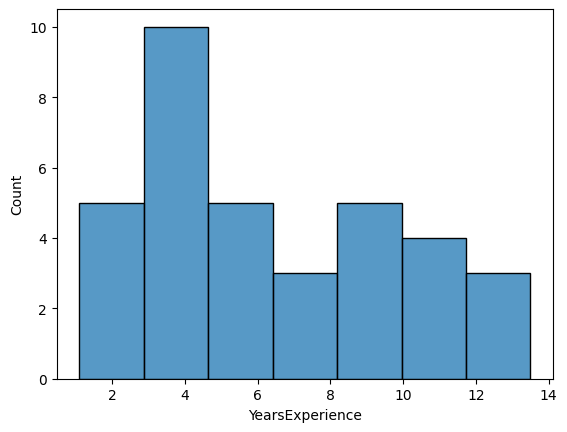

In [11]:
#corroborar datos atipicos
sns.histplot(salarios['YearsExperience'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

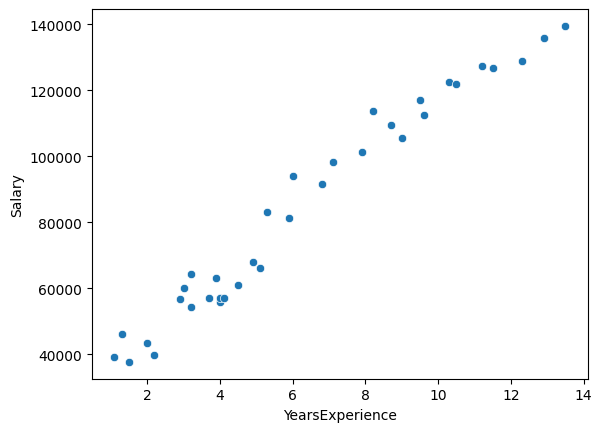

In [14]:
# verificar si en los datos existe una regresion lineal 

sns.scatterplot(x=salarios['YearsExperience'],y=salarios['Salary'])

In [15]:
model = LinearRegression()

In [16]:
# separar variables dependientes de la dependiente
x = salarios[['YearsExperience']]
y = salarios[['Salary']]

In [19]:
#entrenando modelo 
lineal_reg = model.fit(x,y)

In [20]:
# B1
lineal_reg.coef_

array([[8731.94104706]])

In [22]:
#intercepto
lineal_reg.intercept_

array([28859.52619453])

In [27]:
# prediciendo
y_pred = lineal_reg.predict(x)

In [31]:
# manera manual
y_pred_m = lineal_reg.intercept_ + lineal_reg.coef_ * 5

In [32]:
y_pred_m

array([[72519.23142984]])

In [28]:
y_pred

array([[ 38464.6613463 ],
       [ 40211.04955571],
       [ 41957.43776513],
       [ 46323.40828866],
       [ 48069.79649807],
       [ 54182.15523101],
       [ 55055.34933572],
       [ 56801.73754513],
       [ 56801.73754513],
       [ 61167.70806866],
       [ 62914.09627808],
       [ 63787.29038278],
       [ 63787.29038278],
       [ 64660.48448749],
       [ 68153.26090631],
       [ 71646.03732514],
       [ 73392.42553455],
       [ 75138.81374396],
       [ 80377.9783722 ],
       [ 81251.17247691],
       [ 88236.72531456],
       [ 90856.30762868],
       [ 97841.86046633],
       [100461.44278044],
       [104827.41330398],
       [107446.99561809],
       [111812.96614163],
       [112686.16024633],
       [118798.51897928],
       [120544.90718869],
       [126657.26592163],
       [129276.84823575],
       [136262.4010734 ],
       [141501.56570164],
       [146740.73032988]])

In [26]:
# squret
lineal_reg.score(x,y)

0.9651633106751443

In [29]:
#graficar 
import matplotlib.pyplot as plt

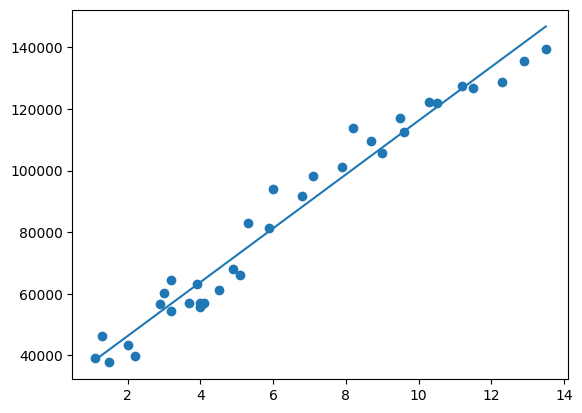

In [30]:
plt.scatter(x,y)
plt.plot(x,y_pred)

# Regresion lineal multiple

In [37]:
import pandas as pd

In [38]:
datos = pd.read_csv('advertising.csv')
datos.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


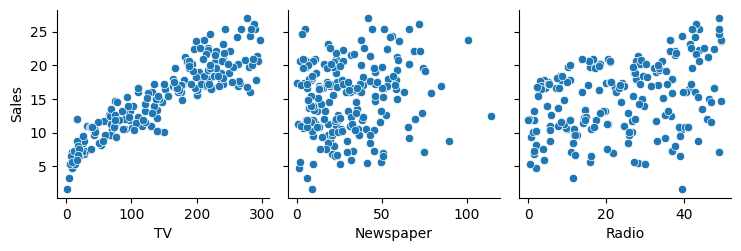

In [39]:
sns.pairplot(datos, x_vars=['TV','Newspaper','Radio'], y_vars='Sales')

In [40]:
datos.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

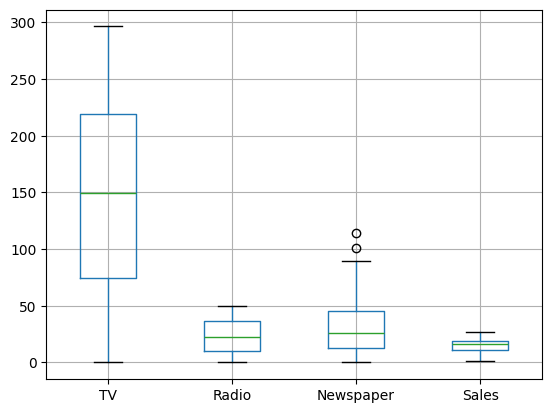

In [41]:
datos.boxplot()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

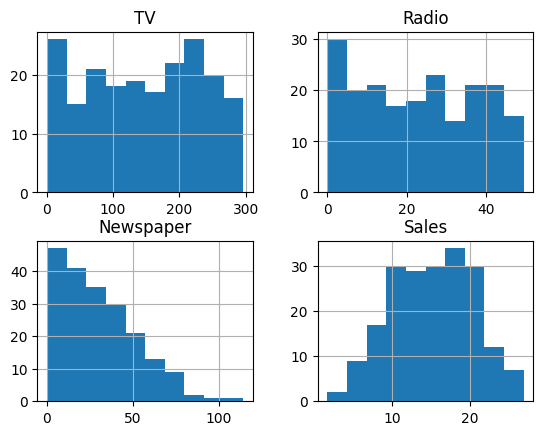

In [42]:
datos.hist()

In [44]:
datos.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = datos[['TV','Radio','Newspaper']]
x = add_constant(x)

VIF_data = pd.DataFrame()
VIF_data['Variable'] = x.columns

VIF_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

VIF_data

,Variable,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Newspaper,1.145187


In [51]:
# Crear modelo de regresion lineal multiple

from sklearn.linear_model import LinearRegressio

model = LinearRegression()

In [52]:
x = datos[['TV','Radio','Newspaper']]
y = datos['Sales']

In [53]:
# entrenar modelo

model.fit(x,y)

LinearRegression()

In [54]:
#intercepto B0
model.intercept_

np.float64(4.625124078808653)

In [55]:
# Betas B1 .....
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [56]:
sales_pred = model.predict(x)

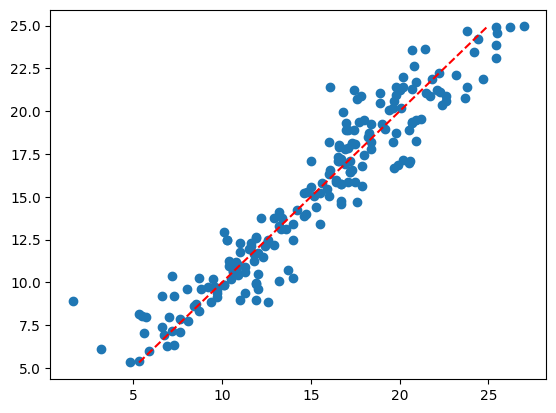

In [57]:
plt.scatter(datos['Sales'], sales_pred)
plt.plot([sales_pred.min(), sales_pred.max()], [sales_pred.min(), sales_pred.max()], '--r')

In [58]:
# evaluadno el modelo con r2
model.score(x,y)

0.9025912899684558

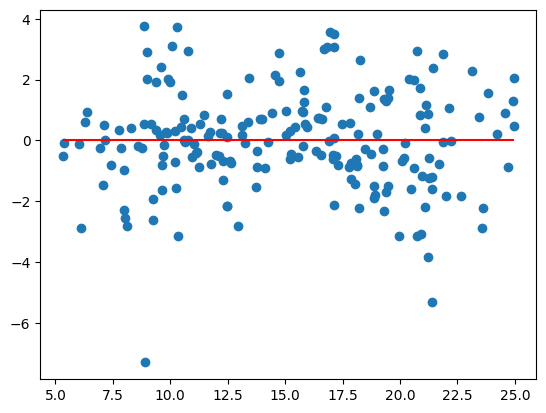

In [61]:
# calcular los residuos
residuos = y - sales_pred

plt.scatter(sales_pred,residuos)
plt.hlines(0,xmin=sales_pred.min(), xmax=sales_pred.max(), colors='r')

In [62]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant


In [67]:
X_2 = datos[['TV','Radio']]
X_2 = add_constant(X_2)
y_2 = datos['Sales']

In [68]:
model_2 = sm.OLS(y_2,X_2).fit()
model_2.params

const    4.630879
TV       0.054449
Radio    0.107175
dtype: float64

In [69]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Wed, 10 Jul 2024   Prob (F-statistic):          2.39e-100
Time:                        18:38:52   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regresion con PCR

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [71]:
datos = pd.read_csv('advertising.csv')
datos.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [73]:
modelo = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('regresion', LinearRegression())
])

In [74]:
X = datos[['TV','Radio','Newspaper']]
y = datos['Sales']

In [75]:
modelo.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('regresion', LinearRegression())])

In [76]:
modelo.predict(X)

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [78]:
regresor = modelo.named_steps['regresion']

In [80]:
regresor.intercept_

np.float64(15.130500000000001)

In [79]:
regresor.coef_

array([ 2.06992121,  4.32260897, -1.13244033])

In [82]:
pca = modelo.named_steps['pca']

In [83]:
#matriz dew trasformacion
pca.components_

array([[ 0.20787391,  0.69139674,  0.69192412],
       [ 0.97814838, -0.14965532, -0.14432267],
       [-0.0037659 , -0.70680537,  0.70739804]])

In [85]:
from sklearn.metrics import r2_score

scare = r2_score(y, model.predict(X))

In [86]:
scare

0.9025912899684558

In [87]:
model.predict(X)

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

## 

In [88]:
import matplotlib.pyplot as plt

In [90]:
datos = pd.read_csv('ExpansiónCobre.csv')

datos.head()

,Expansión,Kelvin
0,0.591,24.41
1,1.547,34.82
2,2.902,44.09
3,2.894,45.07
4,4.703,54.98


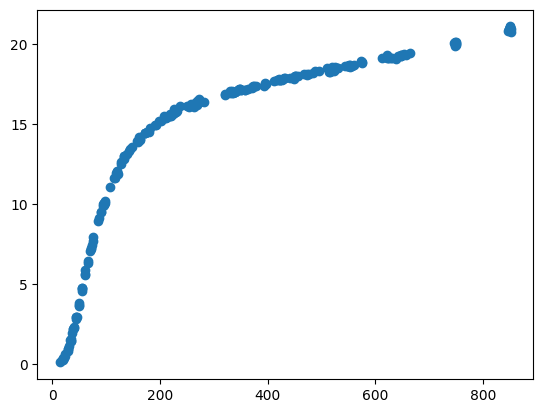

In [92]:
plt.scatter(datos['Kelvin'],datos['Expansión'])

In [93]:
# definiendo funcion 

def logistica(t,a,m,n,tau):
    return a*(1+m*np.exp(-t/tau))/(1+n*np.exp(-t/tau))

In [94]:
X = datos['Kelvin'].values
y = datos['Expansión'].values

In [95]:
from scipy.optimize import curve_fit

In [96]:
params, params_cov = curve_fit(logistica,X,y)

In [101]:
y_pred = logistica(X,*params)

In [102]:
from sklearn.metrics import r2_score, mean_absolute_error


In [103]:
r2_score(y,y_pred)

0.99063558971591

In [104]:
mean_absolute_error(y,y_pred)

np.float64(0.44643945563029763)

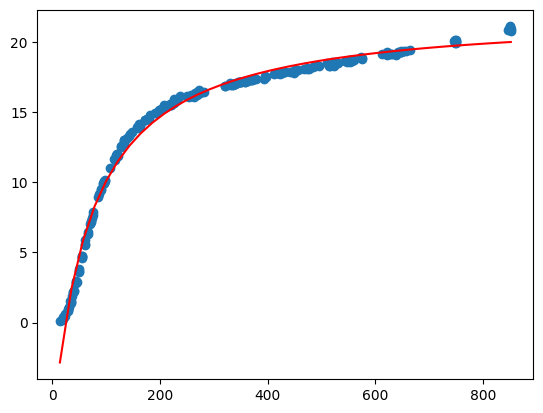

In [107]:
kelvin = np.linspace(X.min(),X.max(),40)
plt.scatter(X,y)
plt.plot(kelvin,logistica(kelvin,*params),color = 'r')
